# Notebook for functions that are still under development.

In [6]:
from working_functions import *
import pickle as pkl
import matplotlib.pyplot as plt

In [7]:
f = open("ori_data.pkl", "rb")
smoothed = pkl.load(f)
fly = smoothed[1]
fly_correc = copy.deepcopy(fly)
fly_correc.ori_correc(overwrite=True)

orientations have been corrected and flipped +90 degrees
Correlation is  0.26834165642076374


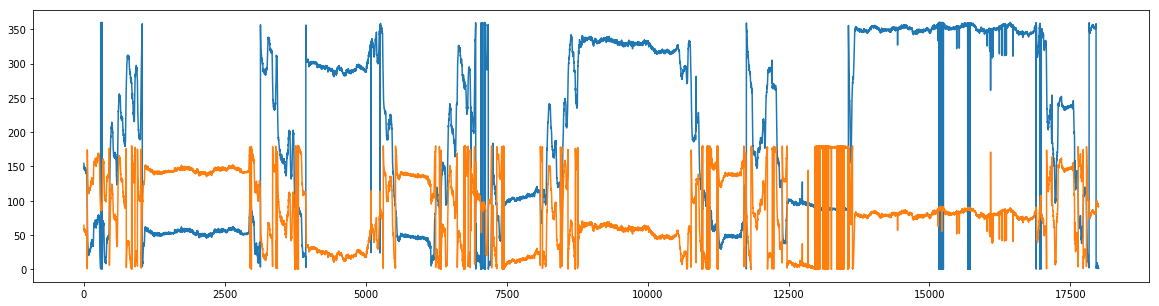

In [8]:
#plt.plot(results['orientations'][:100,0])
# plt.plot(results['speeds'][:100,0])
showrange = range(10000)

plt.figure(figsize=(20,5))
plt.plot(fly_correc.orientations)
plt.plot(fly.orientations)
#plt.plot(fly.directions[showrange])



newrange = range(1000)
#direc_stats(data, newrange, 1)
#direc_stats(data, range(1000,2000), 1)
#Get stats about a random chunk

In [29]:


data = copy.deepcopy(smoothed)

data['orientations'] -=90
data['orientations'][data['orientations'] < 0] +=180
find_goodchunks(data['directions'], data['orientations'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


NameError: name 'find_goodchunks' is not defined

non corrected : 0.4056345853326564
corrected : -0.527783727373184
fliped : 0.8363856040344144
Orientations have been corrected and flipped.
Correlation is  0.8363856040344144


array([224.84448242, 226.16827393, 224.89535522, 225.16171265,
       223.36691284, 225.50421143, 221.6146698 , 224.24099731,
       222.72857666, 224.62875366, 223.19543457, 222.40522766,
       221.06085205, 222.76272583, 222.39573669, 223.35258484,
       224.29296875, 222.11503601, 223.94599915, 226.49256897,
       225.44477844, 225.63887024, 227.67205811, 226.82206726,
       228.30638123, 234.5567627 , 236.50231934, 240.88528442,
       246.97261047, 248.49307251, 253.36921692, 255.24783325,
       255.46487427, 258.21594238, 257.4561615 , 258.22418213,
       261.6362915 , 259.57556152, 258.78321838, 257.37582397,
       260.41749573, 255.90240479, 254.27467346, 254.81916809,
       249.93159485, 247.28694153, 239.1962738 , 233.38119507,
       229.60850525, 225.0920105 , 219.2492981 , 215.38976288,
       210.49310303, 208.38495636, 206.40568542, 201.17292023,
       199.57057953, 199.05843353, 197.19750977, 195.5137558 ,
       195.2687912 , 194.05261993, 194.0655899 , 193.22

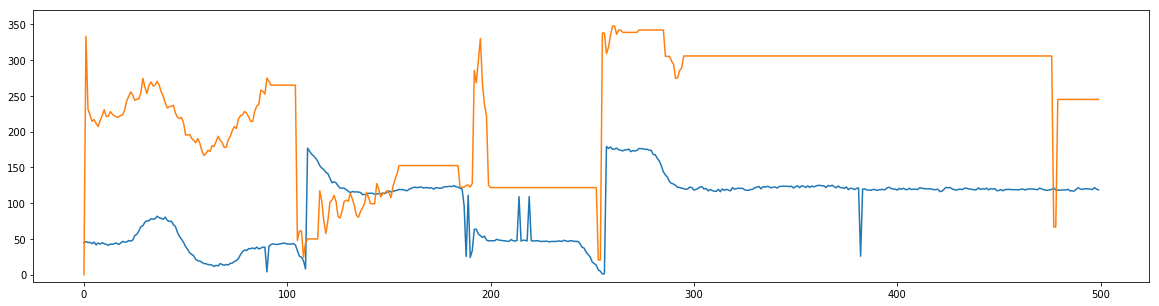

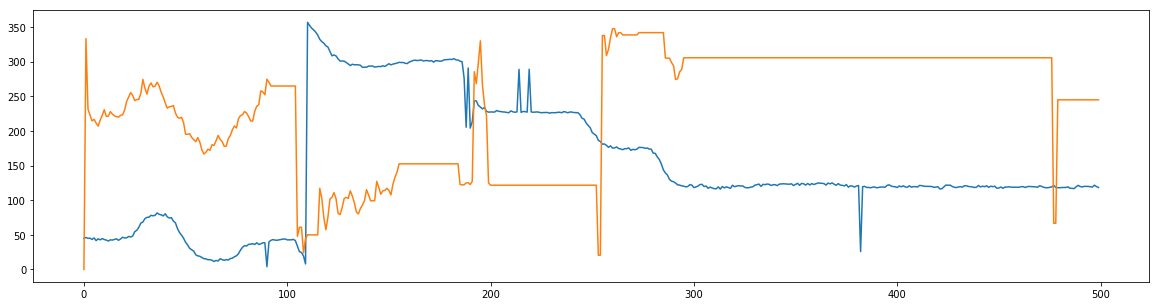

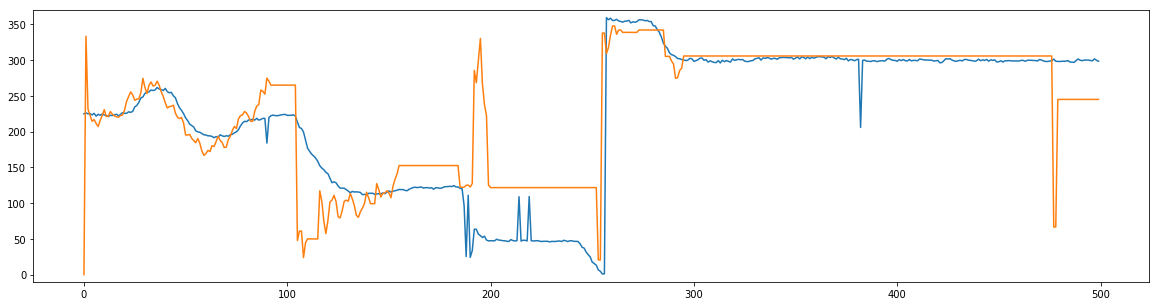

In [30]:
toconv = data['orientations'][:500,4]
tomatch = data['directions'][:500,4]

plt.figure(figsize=(20,5))
plt.ylim([-10,370])
plt.plot(toconv)
plt.plot(tomatch)

       
newori = convert180to360(toconv)    
fliped_ori = flip(newori)

chunk_corr1 = np.corrcoef(np.vstack([newori, tomatch]))[1,0]
chunk_corr2 = np.corrcoef(np.vstack([toconv, tomatch]))[1,0]
chunk_corr3 = np.corrcoef(np.vstack([fliped_ori, tomatch]))[1,0]


print('non corrected :', chunk_corr2)
print('corrected :', chunk_corr1)
print('fliped :', chunk_corr3)

plt.figure(figsize=(20,5))
#plt.ylim([-10,370])
plt.plot(newori)
plt.plot(tomatch)


plt.figure(figsize=(20,5))
plt.ylim([-10,370])
plt.plot(fliped_ori)
plt.plot(tomatch)

ori_correc(toconv, tomatch)

# Function either useless or not functional

In [ ]:
def find_goodchunks(test_array, model):   #Should look for highly correlated areas between two arrays,
                                          #and output all of them.
        #Was going to be used for correcting orientations based on direc, but correc_ori() work fine.
        
        #Is not currently functional. Can be useful in the future
        
    array_size = len(test_array)
    sample_size = int(len(test_array)/50)
    indexes = np.array(range(array_size))
    
    
    for fly in range(len(test_array[1])): #Should be replaced by loop later.

        direc = test_array[...,fly]
        ori = model[...,fly]
        
        
        
        #Take random values of the first array, distributed in every 10th of the data
        sample = np.random.choice(indexes, sample_size)
        good_chunks = list()    
        
        #Extend them to a certain extent
        for ind in sample:
            c_corr, chunk_U = chunk_stat(ind-10,ind+10, direc, ori)
            
            #If {condition} is met, put chunk as accepted model.
            if chunk_U[1] > 0.10:
                good_chunks.append([ind-10,ind+10])

        good_chunks = np.array(good_chunks)
        for good_ind in good_chunks:
            step = 10
            inf = good_ind[0]
            up = good_ind[1]
            while(True):
                c_corr, Uinf = chunk_stat(inf-step, inf, direc, ori)
                if Uinf[1] > 0.1:
                    inf -= step
                else:
                    break
            while(True):
                c_corr, Uup = chunk_stat(up, up+step, direc, ori)
                if Uup[1] > 0.1:
                    up += step
                    print(up)
                else:
                    break
        
        #extend the chunks stepwise and keep only if correlation stays high
        #output chunks

        plt.figure(figsize=(20,5))
        plt.ylim([-10,370])
        plt.plot(ori[:3000])
        plt.plot(direc[:3000])
        plt.plot()                        

        
        
def chunk_stat(inf_lim, up_lim, directions, orientations):
    chunk = directions[inf_lim:up_lim]
    model_chunk = orientations[inf_lim:up_lim]
    #Check for correlation/equal medians
    chunk_corr = np.corrcoef(np.vstack([chunk, model_chunk]))[1,0]
    chunk_U = stats.mannwhitneyu(chunk, model_chunk)
    return(chunk_corr, chunk_U)


def get_angle2(trajectories, frameID, previous_angles, noise_thresh=0.5): 
    #Older, less functional version of get_angle().
    #Should not be used.
    #Outputs direction, speed and distance for a given frame.
    
    positions = trajectories[frameID]

    oldpositions = trajectories[frameID-1] #Get previous values
    delta = positions - oldpositions #Compute difference between two iterations
    
    #Create list in which we'll put things.
    direc = list()
    dist = list()
    speed = list()
    for num in range(len(delta)):
        x = delta[num][0]
        y = delta[num][1]
        
        #Remove noise
        if (x > -noise_thresh) & (x < noise_thresh) &\
        (y > -noise_thresh) & (y < noise_thresh):
            couple = [0,0]
            mov = 0
            angle = previous_angles[num]
        else:
            angle, mov = angleFromPoints(x,y)
        
        dist.append(mov)
        speed.append(mov*30)
        direc.append(angle)
        
        
    return(dist, speed, direc)
